# Data Augmentation using DCGANs (Deep Convolutional Generative adversarial networks)

# Final Framework

1. Importing all necessary functions and libraries

2. Defining the Generator

3. Defining the Discriminator

4. Testing integration

5. Dataset
  - Defining variables
  - Importing dataset
  - Visualising dataset

6. Training
  - Initialising model weights and bias
  - Training and validating model
  - Saving model

7. Creating Augmented data

# 1. Importing all necessary functions and Libraries

In [ ]:
import torch
import numpy as np
import torchvision
from torch import nn
from torch import optim
from google.colab import drive
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision.utils import make_grid

%matplotlib inline

# 2. Defining the Generator

In [ ]:
# generator class

class generator(nn.Module):
  
  def __init__(self):
    
    super(generator, self).__init__()
    
    self.gen = nn.Sequential(
        
        # first block

        nn.ConvTranspose2d(in_channels=100, 
                           out_channels=2048,
                           kernel_size=4,
                           stride=1,
                           padding=0,
                           bias=False),
        nn.BatchNorm2d(num_features=2048),
        nn.ReLU(),
            
        # second block

        nn.ConvTranspose2d(in_channels=2048,
                           out_channels=1024,
                           kernel_size=4,
                           stride=2,
                           padding=1,
                           bias=False),
        nn.BatchNorm2d(num_features=1024),
        nn.ReLU(),
            
        # third block

        nn.ConvTranspose2d(in_channels=1024,
                           out_channels=512,
                           kernel_size=4,
                           stride=2,
                           padding=1,
                           bias=False),
        nn.BatchNorm2d(num_features=512),
        nn.ReLU(),
            
        # fourth block
        
        nn.ConvTranspose2d(in_channels=512,
                           out_channels=256,
                           kernel_size=4,
                           stride=2,
                           padding=1,
                           bias=False),
        nn.BatchNorm2d(num_features=256),
        nn.ReLU(),

        # fifth block

        nn.ConvTranspose2d(in_channels=256,
                           out_channels=128,
                           kernel_size=4,
                           stride=2,
                           padding=1,
                           bias=False),
        nn.BatchNorm2d(num_features=128),
        nn.ReLU(),
            
        # sixth block

        nn.ConvTranspose2d(in_channels=128,
                           out_channels=64,
                           kernel_size=4,
                           stride=2,
                           padding=1,
                           bias=False),
        nn.BatchNorm2d(num_features=64),
        nn.ReLU(),
            
        # final block
        
        nn.ConvTranspose2d(in_channels=64, 
                           out_channels=1,
                           kernel_size=4,
                           stride=2,
                           padding=1,
                           bias=False),
        nn.Tanh()

        )
    
    # forward driving function

  def forward(self, x):
    x = self.gen(x)
    return x

# 3. Defining the Discriminator

In [ ]:
# discriminator class

class discriminator(nn.Module):
  
  def __init__(self):
    
    super(discriminator, self).__init__()

    self.disc = nn.Sequential(
        
        # first block

        nn.Conv2d(in_channels=1,
                  out_channels=64,
                  kernel_size=4,
                  stride=2,
                  padding=1, 
                  bias=False),
        nn.LeakyReLU(negative_slope=0.2),
            
        # second block
            
        nn.Conv2d(in_channels=64,
                  out_channels=128,
                  kernel_size=4,
                  stride=2,
                  padding=1,
                  bias=False),
        nn.BatchNorm2d(num_features=128),
        nn.LeakyReLU(negative_slope=0.2),
            
        # third block

        nn.Conv2d(in_channels=128,
                  out_channels=256,
                  kernel_size=4,
                  stride=2,
                  padding=1,
                  bias=False),
        nn.BatchNorm2d(num_features=256),
        nn.LeakyReLU(negative_slope=0.2),
 
        # fourth block

        nn.Conv2d(in_channels=256,
                  out_channels=512,
                  kernel_size=4,
                  stride=2,
                  padding=1,
                  bias=False),
        nn.BatchNorm2d(num_features=512),
        nn.LeakyReLU(negative_slope=0.2),

        # fifth block

        nn.Conv2d(in_channels=512,
                  out_channels=1024,
                  kernel_size=4,
                  stride=2,
                  padding=1,
                  bias=False),
        nn.BatchNorm2d(num_features=1024),
        nn.LeakyReLU(negative_slope=0.2),

        # sixth block

        nn.Conv2d(in_channels=1024,
                  out_channels=2048,
                  kernel_size=4,
                  stride=2,
                  padding=1,
                  bias=False),
        nn.BatchNorm2d(num_features=2048),
        nn.LeakyReLU(negative_slope=0.2),

        # output block

        nn.Conv2d(in_channels=2048,
                  out_channels=1,
                  kernel_size=4,
                  stride=1,
                  padding=0,
                  bias=False),
        nn.Sigmoid()
        
        )
        
  # forward driving function

  def forward(self, x):
    x = self.disc(x)
    return x

# 4. Testing Integration

In [ ]:
# creating model instances

gen = generator()
disc = discriminator()

# testing integration

print(gen(torch.randn(30, 100, 1, 1)).shape)
print(disc(torch.randn(30, 1, 256, 256)).shape)

torch.Size([30, 1, 256, 256])
torch.Size([30, 1, 1, 1])


# 5. Dataset

Defining variables

In [ ]:
# to access dataset
drive.mount('/content/drive')
root = "/content/drive/My Drive/Colab Notebooks/x_ray_tb/data/train_small/tb"

# training purpose

criterion = nn.BCELoss()
gpu = torch.device(0)

n_epochs = 3500
batch_size = 3
cur_step = 0
epoch = 0

# to validate model

test_noise = torch.randn((4, 100, 1, 1)).to(gpu)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing dataset

In [ ]:
# function to import dataset

def build_data_loader(batch_size):
  dataset = torchvision.datasets.ImageFolder(
      root=root,
      transform=torchvision.transforms.Compose([
                                                torchvision.transforms.Resize(256),
                                                torchvision.transforms.CenterCrop(256),
                                                torchvision.transforms.Grayscale(),
                                                torchvision.transforms.ToTensor() 
                                                ])
      )
  
    
  return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

# importing dataset

data_loader = build_data_loader(batch_size)

Visualising dataset

torch.Size([8, 1, 256, 256])


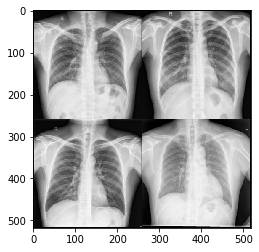

In [ ]:
# function to visualise dataset

def show_tensor_images(image_tensor, num_images=4, nrow=2, show=True):
  image_tensor = (image_tensor + 1) / 2
  image_unflat = image_tensor.detach().cpu()
  image_grid = make_grid(image_unflat[:num_images], nrow=nrow, normalize=True)
  npy_img = image_grid.numpy()
  plt.imshow(np.transpose(npy_img, (1, 2, 0)), interpolation='nearest')
  if show:
    plt.show()

# visualising dataset

for data, _ in build_data_loader(8):
    test_images = data
    break
    
print(test_images.shape)
show_tensor_images(test_images)

# 6. Training

Initialising weights and bias

In [ ]:
# moving the models to gpu

gen = gen.to(gpu)
disc = disc.to(gpu)

# creating optimizers

disc_opt = optim.Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999))
gen_opt = optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))

# function to inintialise weights and bias

def weights_init(m):
  
  if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
    torch.nn.init.normal_(m.weight, 0.0, 0.02)
  if isinstance(m, nn.BatchNorm2d):
    torch.nn.init.normal_(m.weight, 0.0, 0.02)
    torch.nn.init.constant_(m.bias, 0)

# initialising weights and bias

gen = gen.apply(weights_init)
disc = disc.apply(weights_init)

Training and validating model


Epoch: 0/3500
Example images:


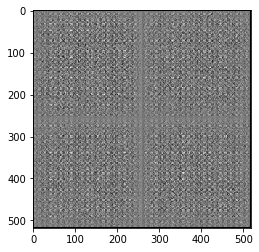


Epoch: 0	Batch: 117/118
Generator Loss: 6.121187210083008
Discriminator Loss: 0.0032705385237932205

Epoch: 1	Batch: 117/118
Generator Loss: 1.9694018363952637
Discriminator Loss: 0.5839362144470215

Epoch: 2	Batch: 117/118
Generator Loss: 2.0024850368499756
Discriminator Loss: 0.5344394445419312

Epoch: 3	Batch: 117/118
Generator Loss: 0.7146639823913574
Discriminator Loss: 1.4749995470046997

Epoch: 4	Batch: 117/118
Generator Loss: 1.6775115728378296
Discriminator Loss: 1.4083646535873413

Epoch: 5	Batch: 117/118
Generator Loss: 1.2171640396118164
Discriminator Loss: 1.3053467273712158

Epoch: 6	Batch: 117/118
Generator Loss: 3.436664342880249
Discriminator Loss: 0.5996968150138855

Epoch: 7	Batch: 117/118
Generator Loss: 2.446946620941162
Discriminator Loss: 0.7895855903625488

Epoch: 8	Batch: 117/118
Generator Loss: 2.0767998695373535
Discriminator Loss: 1.5529804229736328

Epoch: 9	Batch: 117/118
Generator Loss: 3.746690273284912
Discriminator Loss: 1.3801511526107788


Epoch: 10

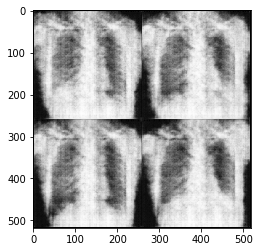


Epoch: 10	Batch: 117/118
Generator Loss: 1.4772552251815796
Discriminator Loss: 0.9941571950912476

Epoch: 11	Batch: 117/118
Generator Loss: 4.843512058258057
Discriminator Loss: 0.9921469688415527

Epoch: 12	Batch: 117/118
Generator Loss: 4.316810607910156
Discriminator Loss: 0.20020899176597595

Epoch: 13	Batch: 117/118
Generator Loss: 2.312112331390381
Discriminator Loss: 0.2936861515045166

Epoch: 14	Batch: 117/118
Generator Loss: 3.816160202026367
Discriminator Loss: 0.44829267263412476

Epoch: 15	Batch: 117/118
Generator Loss: 3.122236490249634
Discriminator Loss: 0.5542604923248291

Epoch: 16	Batch: 117/118
Generator Loss: 4.327788829803467
Discriminator Loss: 0.07106176018714905

Epoch: 17	Batch: 117/118
Generator Loss: 3.6990931034088135
Discriminator Loss: 0.20297808945178986

Epoch: 18	Batch: 117/118
Generator Loss: 8.031288146972656
Discriminator Loss: 1.0240846872329712

Epoch: 19	Batch: 117/118
Generator Loss: 4.554089546203613
Discriminator Loss: 0.4003872871398926


Ep

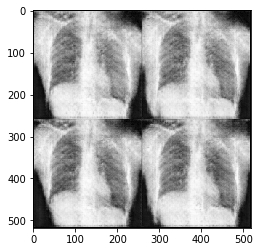


Epoch: 20	Batch: 117/118
Generator Loss: 3.365493059158325
Discriminator Loss: 0.7477402091026306

Epoch: 21	Batch: 117/118
Generator Loss: 3.3768715858459473
Discriminator Loss: 0.21194393932819366

Epoch: 22	Batch: 117/118
Generator Loss: 2.829573631286621
Discriminator Loss: 0.44777679443359375

Epoch: 23	Batch: 117/118
Generator Loss: 5.126434326171875
Discriminator Loss: 0.5871405005455017

Epoch: 24	Batch: 117/118
Generator Loss: 3.4166030883789062
Discriminator Loss: 0.2916969060897827

Epoch: 25	Batch: 117/118
Generator Loss: 3.1863110065460205
Discriminator Loss: 0.6244277358055115

Epoch: 26	Batch: 117/118
Generator Loss: 5.313057899475098
Discriminator Loss: 0.19654914736747742

Epoch: 27	Batch: 117/118
Generator Loss: 2.1789214611053467
Discriminator Loss: 0.5983452200889587

Epoch: 28	Batch: 117/118
Generator Loss: 3.425015926361084
Discriminator Loss: 0.49537330865859985

Epoch: 29	Batch: 117/118
Generator Loss: 3.303377151489258
Discriminator Loss: 0.7814780473709106




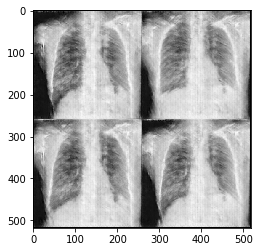


Epoch: 30	Batch: 117/118
Generator Loss: 4.313788890838623
Discriminator Loss: 0.25157254934310913

Epoch: 31	Batch: 117/118
Generator Loss: 4.504484176635742
Discriminator Loss: 0.213515967130661

Epoch: 32	Batch: 117/118
Generator Loss: 5.316170692443848
Discriminator Loss: 0.08132438361644745

Epoch: 33	Batch: 117/118
Generator Loss: 4.461149215698242
Discriminator Loss: 0.25792747735977173

Epoch: 34	Batch: 117/118
Generator Loss: 4.758180141448975
Discriminator Loss: 0.13083189725875854

Epoch: 35	Batch: 117/118
Generator Loss: 3.1495466232299805
Discriminator Loss: 1.6267744302749634

Epoch: 36	Batch: 117/118
Generator Loss: 4.899138450622559
Discriminator Loss: 0.118179552257061

Epoch: 37	Batch: 117/118
Generator Loss: 5.115303039550781
Discriminator Loss: 0.04288823902606964

Epoch: 38	Batch: 117/118
Generator Loss: 4.934006690979004
Discriminator Loss: 0.4295578896999359

Epoch: 39	Batch: 117/118
Generator Loss: 4.178226470947266
Discriminator Loss: 0.043780870735645294


Ep

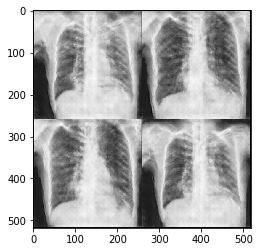


Epoch: 40	Batch: 117/118
Generator Loss: 5.6751203536987305
Discriminator Loss: 0.7600353360176086

Epoch: 41	Batch: 117/118
Generator Loss: 4.485062599182129
Discriminator Loss: 0.5146287083625793

Epoch: 42	Batch: 117/118
Generator Loss: 6.154173851013184
Discriminator Loss: 0.030232952907681465

Epoch: 43	Batch: 117/118
Generator Loss: 5.944231033325195
Discriminator Loss: 0.31042295694351196

Epoch: 44	Batch: 117/118
Generator Loss: 5.156874179840088
Discriminator Loss: 0.07629676163196564

Epoch: 45	Batch: 117/118
Generator Loss: 1.7611697912216187
Discriminator Loss: 0.8024232387542725

Epoch: 46	Batch: 117/118
Generator Loss: 5.044429302215576
Discriminator Loss: 0.0305587537586689

Epoch: 47	Batch: 117/118
Generator Loss: 14.101768493652344
Discriminator Loss: 0.4644542336463928

Epoch: 48	Batch: 117/118
Generator Loss: 14.083062171936035
Discriminator Loss: 0.0007331842207349837

Epoch: 49	Batch: 117/118
Generator Loss: 3.6134824752807617
Discriminator Loss: 0.102601647377014

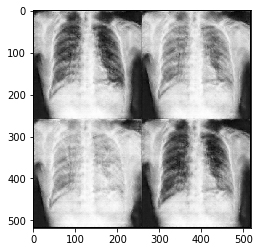


Epoch: 50	Batch: 117/118
Generator Loss: 4.930751800537109
Discriminator Loss: 0.049088168889284134

Epoch: 51	Batch: 117/118
Generator Loss: 4.332829475402832
Discriminator Loss: 0.03534499555826187

Epoch: 52	Batch: 117/118
Generator Loss: 16.810102462768555
Discriminator Loss: 2.4781112670898438

Epoch: 53	Batch: 117/118
Generator Loss: 5.328310012817383
Discriminator Loss: 0.09176942706108093

Epoch: 54	Batch: 117/118
Generator Loss: 6.642575740814209
Discriminator Loss: 0.022388774901628494

Epoch: 55	Batch: 117/118
Generator Loss: 7.40848445892334
Discriminator Loss: 0.001696666469797492

Epoch: 56	Batch: 117/118
Generator Loss: 18.115720748901367
Discriminator Loss: 0.09441228210926056

Epoch: 57	Batch: 117/118
Generator Loss: 5.675433158874512
Discriminator Loss: 0.04052160680294037

Epoch: 58	Batch: 117/118
Generator Loss: 6.777759552001953
Discriminator Loss: 0.017863908782601357

Epoch: 59	Batch: 117/118
Generator Loss: 4.549691200256348
Discriminator Loss: 0.03103829175233

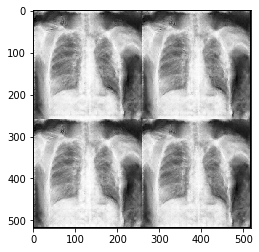


Epoch: 60	Batch: 117/118
Generator Loss: 3.4291205406188965
Discriminator Loss: 0.16877657175064087

Epoch: 61	Batch: 117/118
Generator Loss: 9.19124984741211
Discriminator Loss: 0.009544065222144127

Epoch: 62	Batch: 117/118
Generator Loss: 13.169097900390625
Discriminator Loss: 0.002549984958022833

Epoch: 63	Batch: 117/118
Generator Loss: 11.211118698120117
Discriminator Loss: 0.0136134447529912

Epoch: 64	Batch: 117/118
Generator Loss: 5.188959121704102
Discriminator Loss: 0.02522735670208931

Epoch: 65	Batch: 117/118
Generator Loss: 5.646376132965088
Discriminator Loss: 0.015547020360827446

Epoch: 66	Batch: 117/118
Generator Loss: 4.9212846755981445
Discriminator Loss: 0.016804397106170654

Epoch: 67	Batch: 117/118
Generator Loss: 10.14073657989502
Discriminator Loss: 0.0009643124649301171

Epoch: 68	Batch: 117/118
Generator Loss: 14.059528350830078
Discriminator Loss: 0.005092591512948275

Epoch: 69	Batch: 117/118
Generator Loss: 8.488384246826172
Discriminator Loss: 0.00216816

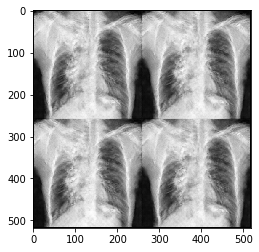


Epoch: 70	Batch: 117/118
Generator Loss: 5.357857704162598
Discriminator Loss: 0.01270662248134613

Epoch: 71	Batch: 117/118
Generator Loss: 5.74906587600708
Discriminator Loss: 0.02344231680035591

Epoch: 72	Batch: 117/118
Generator Loss: 5.918943881988525
Discriminator Loss: 0.007582343649119139

Epoch: 73	Batch: 117/118
Generator Loss: 5.673772811889648
Discriminator Loss: 0.01795533299446106

Epoch: 74	Batch: 117/118
Generator Loss: 5.819830417633057
Discriminator Loss: 0.04661818593740463

Epoch: 75	Batch: 117/118
Generator Loss: 5.13564395904541
Discriminator Loss: 0.01041900273412466

Epoch: 76	Batch: 117/118
Generator Loss: 5.535689353942871
Discriminator Loss: 0.017236212268471718

Epoch: 77	Batch: 117/118
Generator Loss: 4.765037536621094
Discriminator Loss: 0.04477797448635101

Epoch: 78	Batch: 117/118
Generator Loss: 4.750896453857422
Discriminator Loss: 0.30357474088668823

Epoch: 79	Batch: 117/118
Generator Loss: 11.778525352478027
Discriminator Loss: 0.3957769572734833


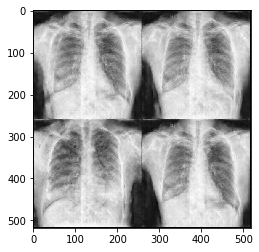


Epoch: 80	Batch: 117/118
Generator Loss: 4.829473972320557
Discriminator Loss: 0.15082620084285736

Epoch: 81	Batch: 117/118
Generator Loss: 5.096569061279297
Discriminator Loss: 0.24748371541500092

Epoch: 82	Batch: 117/118
Generator Loss: 1.9995081424713135
Discriminator Loss: 0.5875722169876099

Epoch: 83	Batch: 117/118
Generator Loss: 6.160733222961426
Discriminator Loss: 0.08568131178617477

Epoch: 84	Batch: 117/118
Generator Loss: 6.638659477233887
Discriminator Loss: 0.08857664465904236

Epoch: 85	Batch: 117/118
Generator Loss: 5.372591018676758
Discriminator Loss: 0.017530925571918488

Epoch: 86	Batch: 117/118
Generator Loss: 5.131810188293457
Discriminator Loss: 0.024646662175655365

Epoch: 87	Batch: 117/118
Generator Loss: 3.3147072792053223
Discriminator Loss: 0.5197979807853699

Epoch: 88	Batch: 117/118
Generator Loss: 17.728591918945312
Discriminator Loss: 0.0004982000682502985

Epoch: 89	Batch: 117/118
Generator Loss: 6.810040473937988
Discriminator Loss: 0.0626263916492

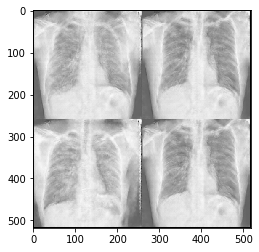


Epoch: 90	Batch: 117/118
Generator Loss: 6.561542510986328
Discriminator Loss: 0.08510615676641464

Epoch: 91	Batch: 117/118
Generator Loss: 8.176498413085938
Discriminator Loss: 0.00930915866047144

Epoch: 92	Batch: 117/118
Generator Loss: 6.945096492767334
Discriminator Loss: 0.012310902588069439

Epoch: 93	Batch: 117/118
Generator Loss: 6.739254951477051
Discriminator Loss: 0.0289759524166584

Epoch: 94	Batch: 117/118
Generator Loss: 7.773120880126953
Discriminator Loss: 0.02399262972176075

Epoch: 95	Batch: 117/118
Generator Loss: 4.032401084899902
Discriminator Loss: 0.12482181191444397

Epoch: 96	Batch: 117/118
Generator Loss: 5.901263236999512
Discriminator Loss: 0.09713323414325714

Epoch: 97	Batch: 117/118
Generator Loss: 14.382224082946777
Discriminator Loss: 0.6544580459594727

Epoch: 98	Batch: 117/118
Generator Loss: 13.510117530822754
Discriminator Loss: 0.0002611571690067649

Epoch: 99	Batch: 117/118
Generator Loss: 4.924856662750244
Discriminator Loss: 0.056416641920804

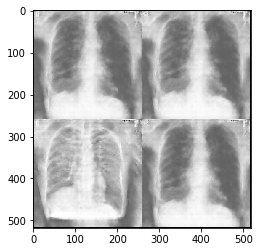


Epoch: 100	Batch: 117/118
Generator Loss: 6.162322044372559
Discriminator Loss: 0.016736377030611038

Epoch: 101	Batch: 117/118
Generator Loss: 7.305719375610352
Discriminator Loss: 0.023421037942171097

Epoch: 102	Batch: 117/118
Generator Loss: 14.309757232666016
Discriminator Loss: 0.00018197434837929904

Epoch: 103	Batch: 117/118
Generator Loss: 5.080394744873047
Discriminator Loss: 0.038144174963235855

Epoch: 104	Batch: 117/118
Generator Loss: 9.140984535217285
Discriminator Loss: 0.0017249666852876544

Epoch: 105	Batch: 117/118
Generator Loss: 5.689980506896973
Discriminator Loss: 0.29905304312705994

Epoch: 106	Batch: 117/118
Generator Loss: 6.815359592437744
Discriminator Loss: 0.00816335715353489

Epoch: 107	Batch: 117/118
Generator Loss: 0.43178391456604004
Discriminator Loss: 1.2374334335327148

Epoch: 108	Batch: 117/118
Generator Loss: 6.389337539672852
Discriminator Loss: 0.0723332092165947

Epoch: 109	Batch: 117/118
Generator Loss: 7.169740200042725
Discriminator Loss: 0

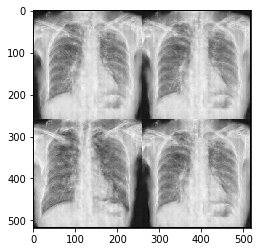


Epoch: 110	Batch: 117/118
Generator Loss: 5.3680315017700195
Discriminator Loss: 0.11678454279899597

Epoch: 111	Batch: 117/118
Generator Loss: 7.885684967041016
Discriminator Loss: 0.010559814050793648

Epoch: 112	Batch: 117/118
Generator Loss: 6.011327743530273
Discriminator Loss: 0.01743152178823948

Epoch: 113	Batch: 117/118
Generator Loss: 7.915300369262695
Discriminator Loss: 0.005731105338782072

Epoch: 114	Batch: 117/118
Generator Loss: 4.751963138580322
Discriminator Loss: 0.0738702192902565

Epoch: 115	Batch: 117/118
Generator Loss: 4.490246772766113
Discriminator Loss: 0.2462068796157837

Epoch: 116	Batch: 117/118
Generator Loss: 4.670867919921875
Discriminator Loss: 0.05936438962817192

Epoch: 117	Batch: 117/118
Generator Loss: 4.3622541427612305
Discriminator Loss: 0.6068015098571777

Epoch: 118	Batch: 117/118
Generator Loss: 2.429363965988159
Discriminator Loss: 0.09798222780227661

Epoch: 119	Batch: 117/118
Generator Loss: 4.75531005859375
Discriminator Loss: 0.02670344

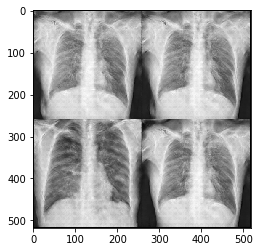


Epoch: 120	Batch: 117/118
Generator Loss: 11.056538581848145
Discriminator Loss: 0.0012419852428138256

Epoch: 121	Batch: 117/118
Generator Loss: 6.36075496673584
Discriminator Loss: 0.006995870731770992

Epoch: 122	Batch: 117/118
Generator Loss: 6.184615612030029
Discriminator Loss: 0.8641743063926697

Epoch: 123	Batch: 117/118
Generator Loss: 5.810118198394775
Discriminator Loss: 0.046635180711746216

Epoch: 124	Batch: 117/118
Generator Loss: 6.342189788818359
Discriminator Loss: 0.10915573686361313

Epoch: 125	Batch: 117/118
Generator Loss: 1.7598438262939453
Discriminator Loss: 0.5679264664649963

Epoch: 126	Batch: 117/118
Generator Loss: 4.4649834632873535
Discriminator Loss: 0.0235509742051363

Epoch: 127	Batch: 117/118
Generator Loss: 5.819000244140625
Discriminator Loss: 0.08708494901657104

Epoch: 128	Batch: 117/118
Generator Loss: 5.794848442077637
Discriminator Loss: 0.054951295256614685

Epoch: 129	Batch: 117/118
Generator Loss: 0.9227093458175659
Discriminator Loss: 1.425

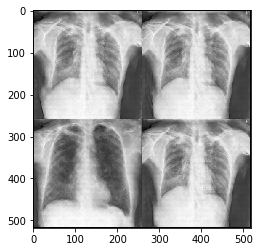


Epoch: 130	Batch: 117/118
Generator Loss: 10.553924560546875
Discriminator Loss: 0.471370667219162

Epoch: 131	Batch: 117/118
Generator Loss: 7.589537620544434
Discriminator Loss: 0.006956982426345348

Epoch: 132	Batch: 117/118
Generator Loss: 10.433609008789062
Discriminator Loss: 0.0005921030533500016

Epoch: 133	Batch: 117/118
Generator Loss: 7.806715965270996
Discriminator Loss: 0.003016037866473198

Epoch: 134	Batch: 117/118
Generator Loss: 9.064279556274414
Discriminator Loss: 0.00887079443782568

Epoch: 135	Batch: 117/118
Generator Loss: 5.678377151489258
Discriminator Loss: 0.005490635521709919

Epoch: 136	Batch: 117/118
Generator Loss: 7.849523544311523
Discriminator Loss: 0.00085072050569579

Epoch: 137	Batch: 117/118
Generator Loss: 8.205395698547363
Discriminator Loss: 0.007779042236506939

Epoch: 138	Batch: 117/118
Generator Loss: 4.909943580627441
Discriminator Loss: 0.036531612277030945

Epoch: 139	Batch: 117/118
Generator Loss: 4.850462913513184
Discriminator Loss: 0.0

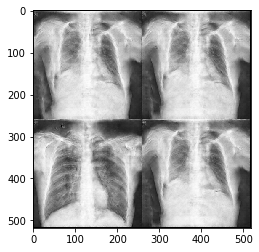


Epoch: 140	Batch: 117/118
Generator Loss: 4.2458038330078125
Discriminator Loss: 0.05575321987271309

Epoch: 141	Batch: 117/118
Generator Loss: 4.373899459838867
Discriminator Loss: 0.05599290877580643

Epoch: 142	Batch: 117/118
Generator Loss: 0.14021769165992737
Discriminator Loss: 1.9051978588104248

Epoch: 143	Batch: 117/118
Generator Loss: 8.30077075958252
Discriminator Loss: 0.5820385813713074

Epoch: 144	Batch: 117/118
Generator Loss: 8.544403076171875
Discriminator Loss: 0.3614168167114258

Epoch: 145	Batch: 117/118
Generator Loss: 8.023521423339844
Discriminator Loss: 0.0030891187489032745

Epoch: 146	Batch: 117/118
Generator Loss: 17.300933837890625
Discriminator Loss: 0.4690760374069214

Epoch: 147	Batch: 117/118
Generator Loss: 5.383869647979736
Discriminator Loss: 0.019448479637503624

Epoch: 148	Batch: 117/118
Generator Loss: 8.649246215820312
Discriminator Loss: 0.004520437680184841

Epoch: 149	Batch: 117/118
Generator Loss: 8.178584098815918
Discriminator Loss: 0.00626

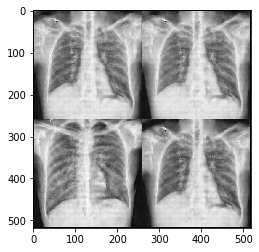


Epoch: 150	Batch: 117/118
Generator Loss: 4.297370433807373
Discriminator Loss: 0.10096962749958038

Epoch: 151	Batch: 117/118
Generator Loss: 7.8966450691223145
Discriminator Loss: 0.7125763297080994

Epoch: 152	Batch: 117/118
Generator Loss: 5.7640380859375
Discriminator Loss: 0.1267692893743515

Epoch: 153	Batch: 117/118
Generator Loss: 4.68858528137207
Discriminator Loss: 0.05637525022029877

Epoch: 154	Batch: 117/118
Generator Loss: 17.956954956054688
Discriminator Loss: 0.01373261772096157

Epoch: 155	Batch: 117/118
Generator Loss: 16.449867248535156
Discriminator Loss: 0.00013808686344418675

Epoch: 156	Batch: 117/118
Generator Loss: 4.136744022369385
Discriminator Loss: 0.10260142385959625

Epoch: 157	Batch: 117/118
Generator Loss: 14.222065925598145
Discriminator Loss: 0.011168910190463066

Epoch: 158	Batch: 117/118
Generator Loss: 8.859827041625977
Discriminator Loss: 0.47614699602127075

Epoch: 159	Batch: 117/118
Generator Loss: 4.088006973266602
Discriminator Loss: 0.04613

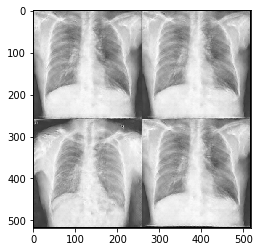


Epoch: 160	Batch: 117/118
Generator Loss: 15.66177749633789
Discriminator Loss: 3.6389326851349324e-05

Epoch: 161	Batch: 117/118
Generator Loss: 5.359616756439209
Discriminator Loss: 0.009842961095273495

Epoch: 162	Batch: 117/118
Generator Loss: 10.455345153808594
Discriminator Loss: 0.037494901567697525

Epoch: 163	Batch: 117/118
Generator Loss: 7.879953861236572
Discriminator Loss: 0.00517268618568778

Epoch: 164	Batch: 117/118
Generator Loss: 5.125714302062988
Discriminator Loss: 0.05452584847807884

Epoch: 165	Batch: 117/118
Generator Loss: 5.325898170471191
Discriminator Loss: 0.015993420034646988

Epoch: 166	Batch: 117/118
Generator Loss: 5.37066650390625
Discriminator Loss: 0.04142053425312042

Epoch: 167	Batch: 117/118
Generator Loss: 9.721309661865234
Discriminator Loss: 0.18259377777576447

Epoch: 168	Batch: 117/118
Generator Loss: 7.783571243286133
Discriminator Loss: 0.0011237967992201447

Epoch: 169	Batch: 117/118
Generator Loss: 4.726884841918945
Discriminator Loss: 0.

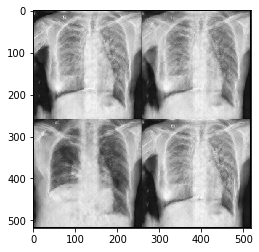


Epoch: 170	Batch: 117/118
Generator Loss: 6.743747234344482
Discriminator Loss: 0.016800377517938614

Epoch: 171	Batch: 117/118
Generator Loss: 4.45234489440918
Discriminator Loss: 0.05313001573085785

Epoch: 172	Batch: 117/118
Generator Loss: 4.493698596954346
Discriminator Loss: 0.11924803256988525

Epoch: 173	Batch: 117/118
Generator Loss: 6.318145751953125
Discriminator Loss: 0.01275718491524458

Epoch: 174	Batch: 117/118
Generator Loss: 7.695126533508301
Discriminator Loss: 0.31696534156799316

Epoch: 175	Batch: 117/118
Generator Loss: 14.279696464538574
Discriminator Loss: 0.0001090232835849747

Epoch: 176	Batch: 117/118
Generator Loss: 11.328073501586914
Discriminator Loss: 0.00035104440758004785

Epoch: 177	Batch: 117/118
Generator Loss: 4.7292985916137695
Discriminator Loss: 0.034900762140750885

Epoch: 178	Batch: 117/118
Generator Loss: 21.264925003051758
Discriminator Loss: 0.0003773407661356032

Epoch: 179	Batch: 117/118
Generator Loss: 10.771197319030762
Discriminator Los

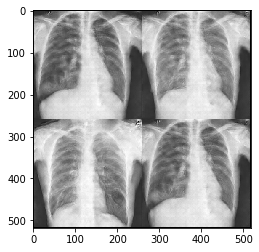


Epoch: 180	Batch: 117/118
Generator Loss: 3.5917344093322754
Discriminator Loss: 0.4038425087928772

Epoch: 181	Batch: 117/118
Generator Loss: 11.279378890991211
Discriminator Loss: 0.00962821114808321

Epoch: 182	Batch: 117/118
Generator Loss: 8.094514846801758
Discriminator Loss: 0.001223702565766871

Epoch: 183	Batch: 117/118
Generator Loss: 4.666367530822754
Discriminator Loss: 0.02058878354728222

Epoch: 184	Batch: 117/118
Generator Loss: 5.255664825439453
Discriminator Loss: 0.035942982882261276

Epoch: 185	Batch: 117/118
Generator Loss: 6.643119812011719
Discriminator Loss: 0.00430332962423563

Epoch: 186	Batch: 117/118
Generator Loss: 8.483741760253906
Discriminator Loss: 0.053030118346214294

Epoch: 187	Batch: 117/118
Generator Loss: 21.04863166809082
Discriminator Loss: 0.0009025600738823414

Epoch: 188	Batch: 117/118
Generator Loss: 10.698665618896484
Discriminator Loss: 0.9446676969528198

Epoch: 189	Batch: 117/118
Generator Loss: 7.31354284286499
Discriminator Loss: 0.170

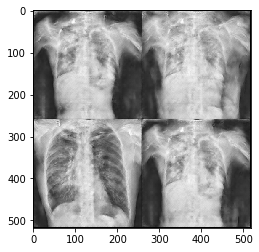


Epoch: 190	Batch: 117/118
Generator Loss: 4.578360557556152
Discriminator Loss: 0.17906883358955383

Epoch: 191	Batch: 117/118
Generator Loss: 10.41109848022461
Discriminator Loss: 0.0004449905827641487

Epoch: 192	Batch: 117/118
Generator Loss: 24.07185173034668
Discriminator Loss: 0.012220846489071846

Epoch: 193	Batch: 117/118
Generator Loss: 13.068914413452148
Discriminator Loss: 0.026534242555499077

Epoch: 194	Batch: 117/118
Generator Loss: 15.272343635559082
Discriminator Loss: 0.12901759147644043

Epoch: 195	Batch: 117/118
Generator Loss: 5.257326602935791
Discriminator Loss: 0.10145306587219238

Epoch: 196	Batch: 117/118
Generator Loss: 16.668441772460938
Discriminator Loss: 0.009975208900868893

Epoch: 197	Batch: 117/118
Generator Loss: 6.903702735900879
Discriminator Loss: 0.27644169330596924

Epoch: 198	Batch: 117/118
Generator Loss: 4.620555877685547
Discriminator Loss: 0.03350931406021118

Epoch: 199	Batch: 117/118
Generator Loss: 5.589774131774902
Discriminator Loss: 0.

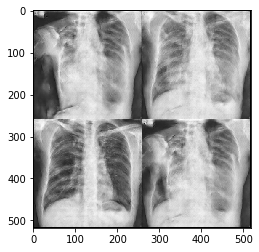


Epoch: 200	Batch: 117/118
Generator Loss: 5.6957502365112305
Discriminator Loss: 0.013997343368828297

Epoch: 201	Batch: 117/118
Generator Loss: 4.783919334411621
Discriminator Loss: 0.018024878576397896

Epoch: 202	Batch: 117/118
Generator Loss: 16.271419525146484
Discriminator Loss: 0.002623731503263116

Epoch: 203	Batch: 117/118
Generator Loss: 5.578793048858643
Discriminator Loss: 0.05901530385017395

Epoch: 204	Batch: 117/118
Generator Loss: 5.872827529907227
Discriminator Loss: 0.01615636609494686

Epoch: 205	Batch: 117/118
Generator Loss: 9.840106964111328
Discriminator Loss: 0.2522614896297455

Epoch: 206	Batch: 117/118
Generator Loss: 7.421821594238281
Discriminator Loss: 0.008249867707490921

Epoch: 207	Batch: 117/118
Generator Loss: 11.296159744262695
Discriminator Loss: 0.00022162387904245406

Epoch: 208	Batch: 117/118
Generator Loss: 4.898252487182617
Discriminator Loss: 0.04817425459623337

Epoch: 209	Batch: 117/118
Generator Loss: 5.856383800506592
Discriminator Loss: 0

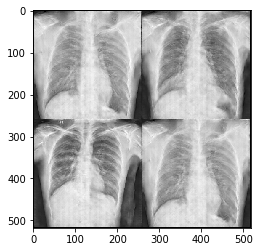


Epoch: 210	Batch: 46/118

KeyboardInterrupt: ignored

In [ ]:
while True:
  
  if cur_step % 10 == 0:
    print()
    print(f"Epoch: {epoch}/{n_epochs}")
    print("Example images:")
    generated_images = gen(test_noise).detach().cpu()
    show_tensor_images(generated_images)
    print()
    
  for i, (batch, _) in enumerate(data_loader):
    print(f"\rEpoch: {epoch}\tBatch: {i}/{len(data_loader)}", end='')
    
    # Train the discriminiator ##
    disc.zero_grad()

    # Compute error on real data
    real = Variable(batch).to(gpu)
    real_lab = Variable(torch.ones(real.size(0), 1, 1, 1)).to(gpu)
    real_pred = disc(real)
    d_error_real = criterion(real_pred, real_lab)
        
    # Compute error on fake data
    noise = Variable(torch.randn(real.size(0), 100, 1, 1)).to(gpu)
    fake = gen(noise)
    fake_pred = disc(fake.detach())
    fake_lab = Variable(torch.zeros(real.size(0), 1, 1, 1)).to(gpu)
    d_error_fake = criterion(fake_pred, fake_lab)
        
    # Accumulate and backpropogate on combined error
    d_error_total = d_error_real + d_error_fake
    d_error_total.backward()
    disc_opt.step()
        
    ## Train the generator ##
    gen.zero_grad()
        
    # Compute rate of fakes being detected
    gen_lab = Variable(torch.ones(real.size(0), 1, 1, 1)).to(gpu)
    results = disc(fake)
    g_error = criterion(results, gen_lab)
        
    # Backpropogate and update weights
    g_error.backward()
    gen_opt.step()

  epoch = epoch + 1
  cur_step = cur_step + 1
  print()
  print(f"Generator Loss: {g_error}")
  print(f"Discriminator Loss: {d_error_total}")
  print()

Saving model

In [ ]:
torch.save(gen.state_dict(), "trained_generator")
torch.save(disc.state_dict(), "trained_discriminator")

# 7. Creating Augmented data

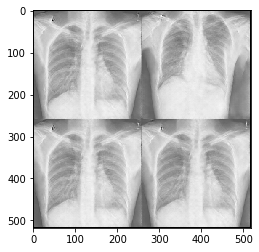

In [ ]:
# function to create augmented data

def gen_data(num_img):

  gen = generator()
  gen.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/x_ray_tb/models/save_models/trained_generator_dcgan'))

  noise = torch.randn(num_img, 100, 1, 1)
  
  images = gen(noise).detach()
  show_tensor_images(images)
  return images

# creating augmented data

images = gen_data(10)

In [ ]:
from torchvision.utils import save_image

for i in range(10):
  save_image(images[i], 'img'+str(i)+'.png')